In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

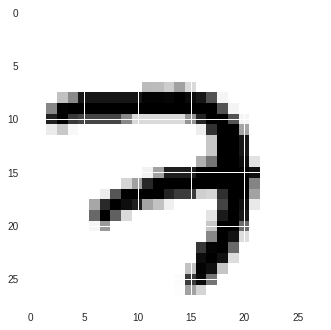

In [0]:
import numpy as np
from matplotlib import pyplot as plt
first_image = mnist.train.images[0]
first_image = np.array(first_image,dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [0]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

bias = {
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def forward_propogation(x,weights,bias):
    in_layer_1 = tf.add(tf.matmul(x,weights['h1']),bias['h1'])
    out_layer_1 = tf.nn.relu(in_layer_1)#activation function
    
    in_layer_2 = tf.add(tf.matmul(out_layer_1,weights['h2']),bias['h2'])
    out_layer_2 = tf.nn.relu(in_layer_2)
    
    output = tf.add(tf.matmul(out_layer_2,weights['out']),bias['out'])
    return output

In [0]:
x = tf.placeholder('float',[None,784])
y = tf.placeholder(tf.int32,[None,10])
pred = forward_propogation(x,weights,bias)

In [0]:
#cost function #suppose we haven't created session
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
c
#cost is reducing with each iteration

2581.8542

In [0]:
for i in range(25):
    c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
    print(c)

1322.7948
806.8841
632.9657
591.59845
563.0074
522.66754
465.46234
400.12427
336.89035
283.04996
241.86183
211.71263
186.92252
163.16513
141.35031
124.89745
115.51593
111.95515
111.117676
109.35586
104.7851
97.95858
90.610825
84.19182
78.7869


In [0]:
pred_labels = tf.argmax(pred,1) #return the index with max_value
true_labels = tf.argmax(y,1)
correct_labels = tf.equal(pred_labels,true_labels)
pred_eval,correct_pred = sess.run([pred_labels,correct_labels],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()

8343

In [0]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x:batch_x,y:batch_y})
        total_cost += c
    print(total_cost) 
    

13838.132528424263
4134.722535265944
2368.6972770581187
1772.1335264113711
1261.1282616008352
1149.2947897966371
1021.0186636103081
949.942695017608
865.7913999311985
781.4523414243564
594.4921813148843
573.7048436039186
659.0300789705118
557.9498871641749
409.316132669133
372.75097331332256
375.0284583228605
352.2826589833457
278.8566598632969
295.99085517297414
352.37440325465536
250.07948738196205
215.88280845922685
248.8021585484969
231.42146417122223


In [0]:
pred_labels = tf.argmax(pred,1) #return the index with max_value
true_labels = tf.argmax(y,1)
correct_labels = tf.equal(pred_labels,true_labels)
pred_eval,correct_pred = sess.run([pred_labels,correct_labels],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()

9579